<a href="https://colab.research.google.com/github/Rajakala7/NeuralNetworks/blob/main/Assignment%209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Dense
from keras.models import Model


encoding_dim = 32

input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))



4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/5
235/235 [==============================] - 9s 26ms/step - loss: 0.6959 - val_loss: 0.6958
Epoch 2/5
235/235 [==============================] - 4s 18ms/step - loss: 0.6957 - val_loss: 0.6956
Epoch 3/5
235/235 [==============================] - 3s 13ms/step - loss: 0.6955 - val_loss: 0.6954
Epoch 4/5
235/235 [==============================] - 2s 10ms/step - loss: 0.6953 - val_loss: 0.6952
Epoch 5/5
235/235 [==============================] - 2s 10ms/step - loss: 0.6951 - val_loss: 0.6950


Epoch 1/5
235/235 [==============================] - 9s 32ms/step - loss: 0.6938 - accuracy: 4.1667e-04 - val_loss: 0.6937 - val_accuracy: 0.0010
Epoch 2/5
235/235 [==============================] - 6s 27ms/step - loss: 0.6937 - accuracy: 4.1667e-04 - val_loss: 0.6936 - val_accuracy: 0.0010
Epoch 3/5
235/235 [==============================] - 6s 24ms/step - loss: 0.6936 - accuracy: 4.3333e-04 - val_loss: 0.6935 - val_accuracy: 0.0010
Epoch 4/5
235/235 [==============================] - 7s 28ms/step - loss: 0.6935 - accuracy: 4.3333e-04 - val_loss: 0.6934 - val_accuracy: 0.0010
Epoch 5/5
313/313 [==============================] - 1s 3ms/step


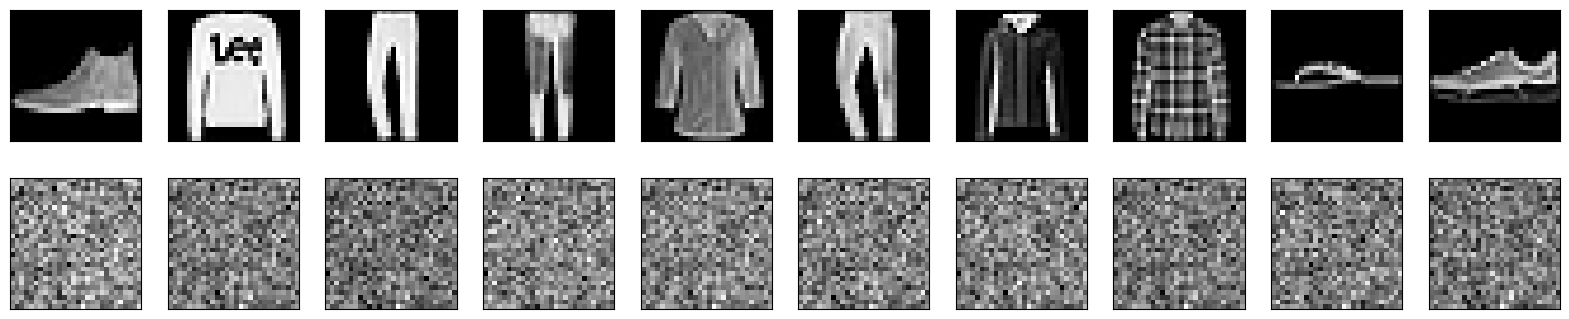

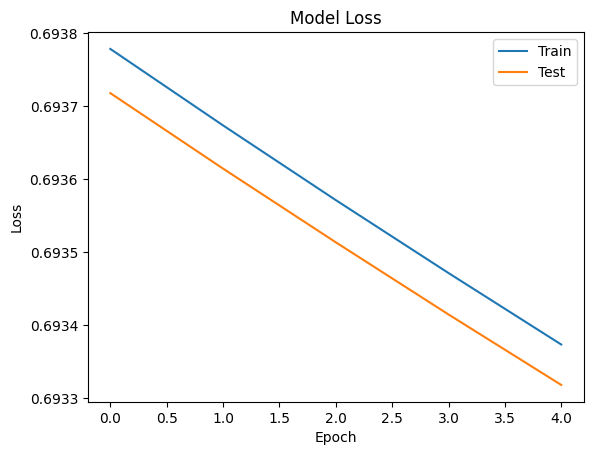

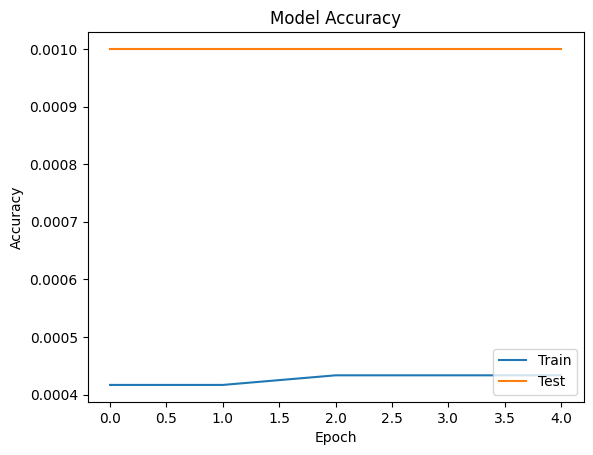

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

encoding_dim = 32

input_img = Input(shape=(784,))

hidden_1 = Dense(256, activation='relu')(input_img)

encoded = Dense(encoding_dim, activation='relu')(hidden_1)

hidden_2 = Dense(256, activation='relu')(encoded)

# Define the output layer
decoded = Dense(784, activation='sigmoid')(hidden_2)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

# Load the fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

decoded_imgs = autoencoder.predict(x_test)

# Visualize one of the reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original test image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed test image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [3]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


Epoch 1/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6955 - val_loss: 0.6955
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6952 - val_loss: 0.6952
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6950 - val_loss: 0.6950
Epoch 4/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6948 - val_loss: 0.6948
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6946 - val_loss: 0.6945
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6943 - val_loss: 0.6943
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6941 - val_loss: 0.6941
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6939 - val_loss: 0.6939
Epoch 9/10
235/235 [==============================] - 3s 14ms/step - loss: 0.6937 - val_loss: 0.6937
Epoch 10/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6935 - val_lo

Epoch 1/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6991 - accuracy: 0.0011 - val_loss: 0.6989 - val_accuracy: 0.0012
Epoch 2/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6988 - accuracy: 0.0012 - val_loss: 0.6986 - val_accuracy: 0.0012
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6985 - accuracy: 0.0011 - val_loss: 0.6983 - val_accuracy: 0.0012
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6982 - accuracy: 0.0012 - val_loss: 0.6980 - val_accuracy: 0.0013
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6979 - accuracy: 0.0012 - val_loss: 0.6977 - val_accuracy: 0.0013
Epoch 6/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6976 - accuracy: 0.0012 - val_loss: 0.6975 - val_accuracy: 0.0013
Epoch 7/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6974 - accuracy: 0.0012 - val_loss: 0.6972 - val_accuracy: 0.0013

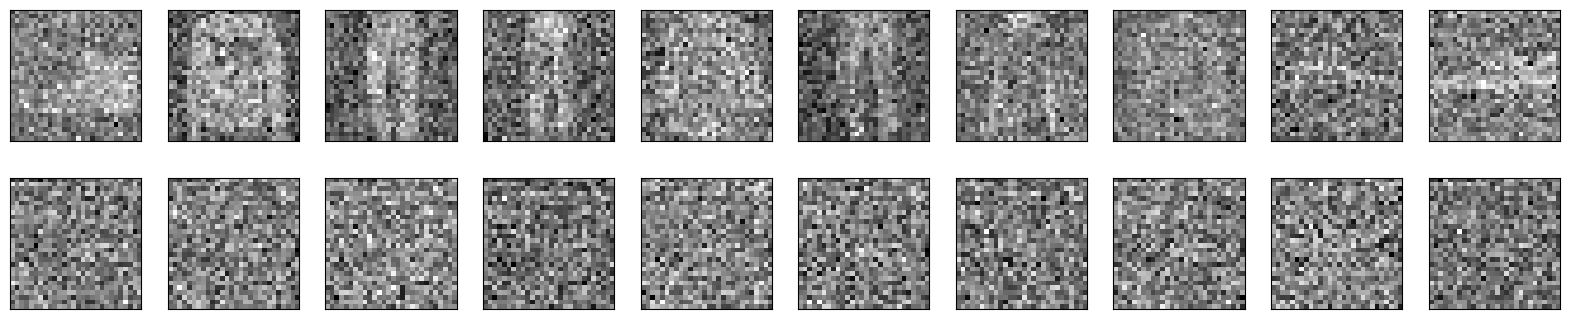

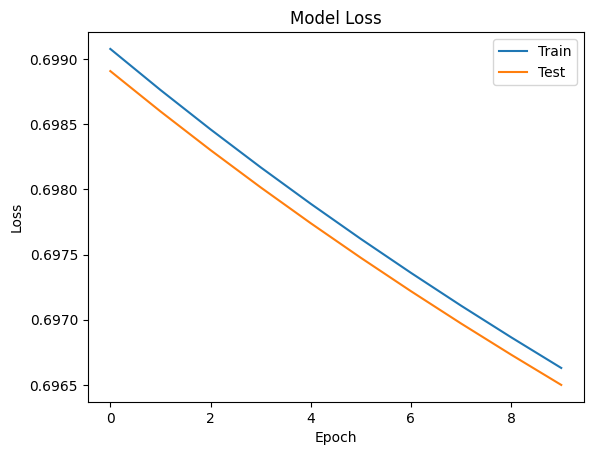

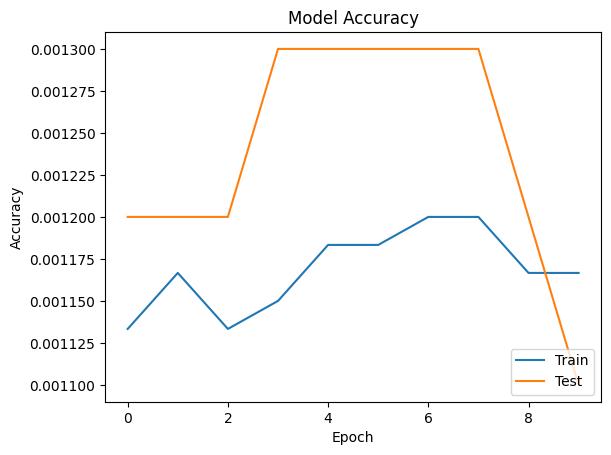

In [4]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

encoding_dim = 32

input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)

decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

# Load the fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize the data and flatten the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

noise_factor = 0.5
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualize one of the noisy test images
plt.figure(figsize=(20, 4))
n = 10
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Visualize one of the reconstructed test images
for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
